# Project Capstone Diabetes
ID Team : CC25-CF255

# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive

import tensorflow as tf

# Data Loadingg

## Load data dari drive

Mount

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


all data

In [ ]:
data_path = '/content/drive/MyDrive/Capstone/dataset_diabetes.csv'
df = pd.read_csv(data_path)

print("Semua kolom dalam dataset:")
print(df.columns.tolist())


Semua kolom dalam dataset:
['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

## Selected feature

In [ ]:
selected_features = [
    'HighBP',
    'HighChol',
    'CholCheck',
    'BMI',
    'Smoker',
    'Stroke',
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'GenHlth',
    'MentHlth',
    'PhysHlth',
    'DiffWalk',
    'Sex',
    'Age',
    'Education',
    'Income'


]

target = 'Diabetes_binary'


# Preprocessing

## Missing Value

Cek missing value

In [ ]:
print("Jumlah missing value per kolom:")
print(df[selected_features + [target]].isnull().sum())


Jumlah missing value per kolom:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64


Data tidak memiliki missing value

## Outlier

Penanganan Outlier pakai IQR

In [ ]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower) & (df[column] <= upper)]
    return df_cleaned

Menerapkan IQR ke Feature Numerik

In [ ]:
numerical_cols = ["Age", "BMI", "HighBP", "PhysHlth", "GenHlth", "Education", "Income"]

for col in numerical_cols:
    before = len(df)
    df = handle_outliers_iqr(df, col)
    after = len(df)
    removed = before - after

    print(f"Outliers removed from {col}: {removed} data")
    print(df[col].describe())

Outliers removed from Age: 0 data
count    70692.000000
mean         8.584055
std          2.852153
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         13.000000
Name: Age, dtype: float64
Outliers removed from BMI: 2181 data
count    68511.000000
mean        29.129673
std          5.695466
min         13.000000
25%         25.000000
50%         28.000000
75%         33.000000
max         45.000000
Name: BMI, dtype: float64
Outliers removed from HighBP: 0 data
count    68511.000000
mean         0.556626
std          0.496787
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HighBP, dtype: float64
Outliers removed from PhysHlth: 12462 data
count    56049.000000
mean         1.242092
std          2.487107
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         12.000000
Name: PhysHlth, dtype: float64
Outliers removed from GenHlth: 10

Encodung

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Smoker'], drop_first=True)

Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_all = df_encoded.drop(columns=['Diabetes_binary'])
y_all = df_encoded['Diabetes_binary']

rf = RandomForestClassifier(random_state=42)
rf.fit(X_all, y_all)

# Ambil 7 fitur terpenting
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X_all.columns)
top7_features = feat_importance.sort_values(ascending=False).head(7).index.tolist()

print("Top 7 fitur terpenting:", top7_features)

Top 7 fitur terpenting: ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education']


## Memisahkan Feature & Target

In [ ]:
X =  df[top7_features]
y = df[target]

## Split Data

parameter dari train_test_split --> stratify

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

untuk val

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

## Scaling Fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, 'scaler_diabetes.joblib')


['scaler_diabetes.joblib']

# Modeling

model

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# activation function: relu, sigmoid, tanh, linear,

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(7,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)




Train

dicoba epochs yang sedikit, misal mulai dari 5.

In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=30,
    batch_size=32,
    class_weight=class_weights
)


Epoch 1/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6352 - loss: 0.6432 - val_accuracy: 0.7262 - val_loss: 0.5487
Epoch 2/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7237 - loss: 0.5559 - val_accuracy: 0.7304 - val_loss: 0.5279
Epoch 3/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7350 - loss: 0.5369 - val_accuracy: 0.7304 - val_loss: 0.5248
Epoch 4/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7337 - loss: 0.5336 - val_accuracy: 0.7304 - val_loss: 0.5220
Epoch 5/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7348 - loss: 0.5324 - val_accuracy: 0.7300 - val_loss: 0.5220
Epoch 6/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7320 - loss: 0.5356 - val_accuracy: 0.7318 - val_loss: 0.5198
Epoch 7/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7301 - loss: 0.5331 - val_accuracy: 0.7292 - val_loss: 0.5203
Epoch 8/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7340 - loss: 0.5311 

# Evaluasi Model ASLIII


In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"\nAkurasi pada data test: {test_acc:.2f}")

# Predict n laporan klasifikasi
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7280 - loss: 0.5266

Akurasi pada data test: 0.73
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.68      0.74      6135
         1.0       0.66      0.79      0.72      4873

    accuracy                           0.73     11008
   macro avg       0.73      0.74      0.73     11008
weighted avg       0.74      0.73      0.73     11008



# Visualisasi n Evaluasi

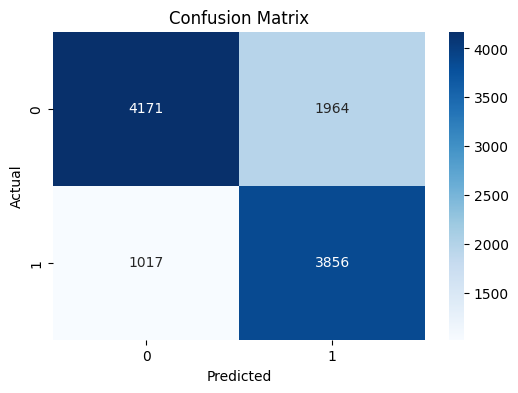

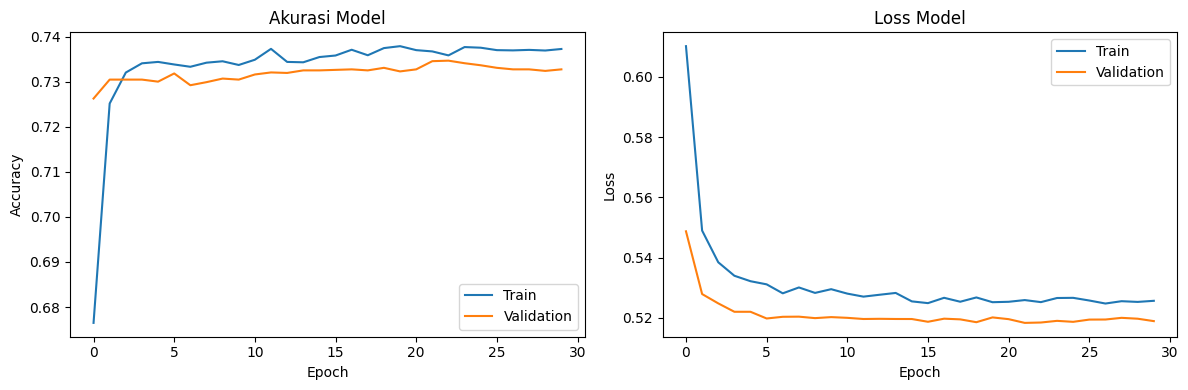

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Akurasi Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save("model_diabetes.h5")
print("Model berhasil disimpan ke model_diabetes.h5")


Model berhasil disimpan ke model_diabetes.h5


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

model = load_model("model_diabetes.h5")

# Format: [BMI, Age, GenHlth, Income, HighBP, Education, PhysHlth]
data_baru = np.array([[20, 20, 2, 4, 0, 3, 1]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

data_baru_scaled = scaler.transform(data_baru)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

prob = model.predict(data_baru_scaled)[0][0]
prediksi = int(prob > 0.5)

print(f"Probabilitas diabetes: {prob:.2f}")
if prediksi == 1:
    print("Prediksi: Pasien berisiko diabetes")
else:
    print("Prediksi: Pasien tidak berisiko diabetes")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Probabilitas diabetes: 0.48
Prediksi: Pasien tidak berisiko diabetes
